# Loan Approval Prediction

### Aim:
To develop a predictive model that accurately predicts whether a loan applicant will be approved or denied based on various features such as credit score, annual income, loan amount, credit history, etc.

## Library and datasets:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Feature description(Information about columns)

- loan_id: Unique loan ID

- no_of_dependents: Number of Dependents of the Applicant

- education: Education of the Applicant (Graduate/Not Graduate)

- self_employed: Employment Status of the Applicant

- income_annum: Annual Income of the Applicant

- loan_amount: Loan Amount

- loan_term: Loan Term in Years

- cibil_score: Credit Score

- residential_assets_value: Value of the residential asset of the applicant

- commercial_assets_value: Value of the commercial asset of the applicant

- luxury_assets_value: Value of the luxury asset of the applicant

- bank_asset_value: Value of the bank asset of the applicant

- loan_status: Loan Approval Status (Approved/Rejected)

 ##  Feature Engineering

In [3]:
# from the data we do not need loan_id column so we are dropping it from the data set

df.drop('loan_id',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [5]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [6]:
df.rename(columns=lambda x: x.strip(),inplace=True)
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [7]:
# movable assets
df['Movable_assets'] = df['bank_asset_value'] + df["luxury_assets_value"]

#Immovable assets
df['Immovable_assets'] = df['residential_assets_value'] + df['commercial_assets_value']

In [8]:
# dropping extra columns
df.drop(["bank_asset_value","luxury_assets_value","residential_assets_value",'commercial_assets_value'],axis=1,inplace=True)


In [9]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [10]:
# unique value of each columns
for col in df.columns:
    print(f'value count of {col} = {len(df[col].value_counts())}')

value count of no_of_dependents = 6
value count of education = 2
value count of self_employed = 2
value count of income_annum = 98
value count of loan_amount = 378
value count of loan_term = 10
value count of cibil_score = 601
value count of loan_status = 2
value count of Movable_assets = 484
value count of Immovable_assets = 406


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no_of_dependents  4269 non-null   int64 
 1   education         4269 non-null   object
 2   self_employed     4269 non-null   object
 3   income_annum      4269 non-null   int64 
 4   loan_amount       4269 non-null   int64 
 5   loan_term         4269 non-null   int64 
 6   cibil_score       4269 non-null   int64 
 7   loan_status       4269 non-null   object
 8   Movable_assets    4269 non-null   int64 
 9   Immovable_assets  4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


In [12]:
# seperating categorical and numerical columns
#Categorical columns
cat_col = df.select_dtypes(object)

#numerical columns
num_col = df.select_dtypes([int ,float])

## Exploratory Data Analysis(EDA)

In [13]:
df.isna().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
Movable_assets      0
Immovable_assets    0
dtype: int64

In [14]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no_of_dependents  4269 non-null   int64 
 1   education         4269 non-null   object
 2   self_employed     4269 non-null   object
 3   income_annum      4269 non-null   int64 
 4   loan_amount       4269 non-null   int64 
 5   loan_term         4269 non-null   int64 
 6   cibil_score       4269 non-null   int64 
 7   loan_status       4269 non-null   object
 8   Movable_assets    4269 non-null   int64 
 9   Immovable_assets  4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


- No null value is present in the dataset
- There are 4269 entries
- There are total 10 features (0 to 9)

## visualisation

### number of dependent distrubution

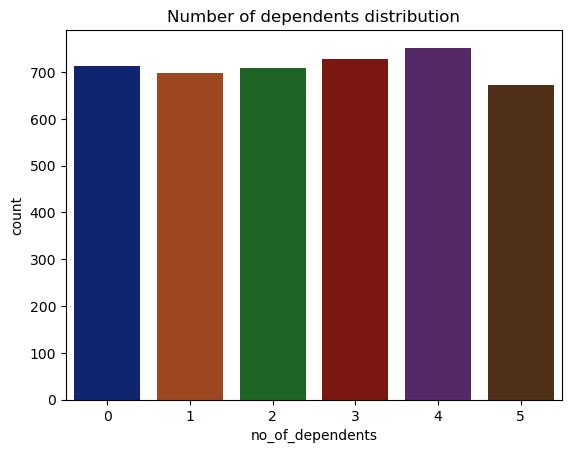

In [16]:
sns.countplot(data=df , x = 'no_of_dependents', palette='dark')
plt.title('Number of dependents distribution')
plt.show()

This graph illustrate the count of dependents of loan applicants

## Number of Dependants Vs Loan Status

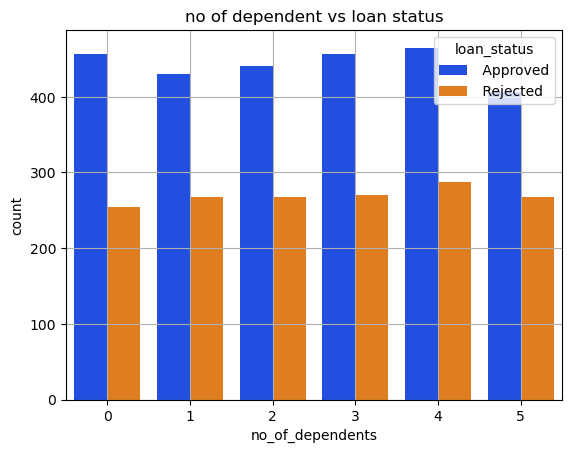

In [17]:
sns.countplot(data=df, x ='no_of_dependents',hue = 'loan_status',palette='bright')
plt.title('no of dependent vs loan status')
plt.grid()
plt.show()

When someone has more family members they take care of, their chances of loan rejection go up. But what's interesting is that the number of people who get loans approved doesn't change much, even if they have more family members.

## Education Vs Loan Status

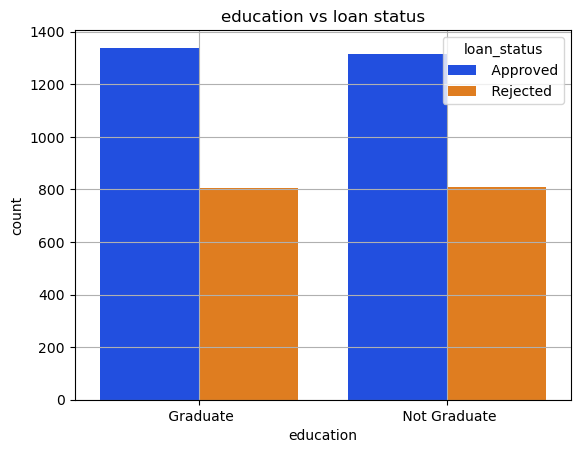

In [18]:
sns.countplot(data=df ,x ='education' , hue= 'loan_status',palette='bright' )
plt.title('education vs loan status')
plt.grid()
plt.show()

The graph indicates that there's only a small difference between the number of loans approved and rejected for both graduate and non-graduate applicants. This difference is so small that it doesn't seem to be significant.

## Loan_Amount And Terns

In [19]:
df.head(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000


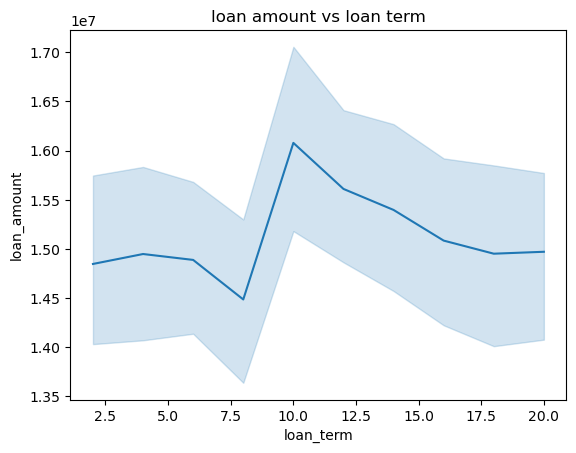

In [20]:
sns.lineplot(data=df,x = 'loan_term' , y = 'loan_amount')
plt.title('loan amount vs loan term')
plt.show()

This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5years the loan amount is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years.

## Loan amount & tenure Vs Loan Status

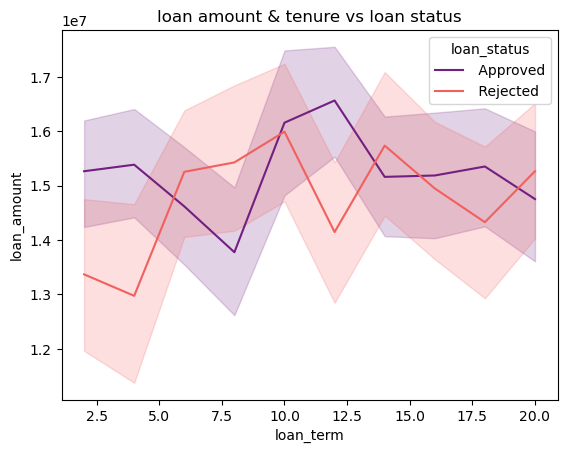

In [21]:
sns.lineplot(data=df,x = 'loan_term' , y = 'loan_amount',hue='loan_status',palette='magma')
plt.title('loan amount & tenure vs loan status')
plt.show()

The graph show than depending upon loan amount and time of repay, loan approval get affected. It's clear that loans that are accepted often have higher amounts and shorter repayment times. On the other hand, loans that are rejected are usually for lower amounts and longer repayment periods. This could be because the bank prefers to approve loans that are easier to pay back quickly and that bring in more profit. They might not want to deal with very small loans due to the costs involved.

## CIBIL Score Distribution with loan status

cibil  = meaning

300-549 = Poor

550-649 = Fair

650-749 = Good

750-799 = VeryGood

800-900 = Excellent

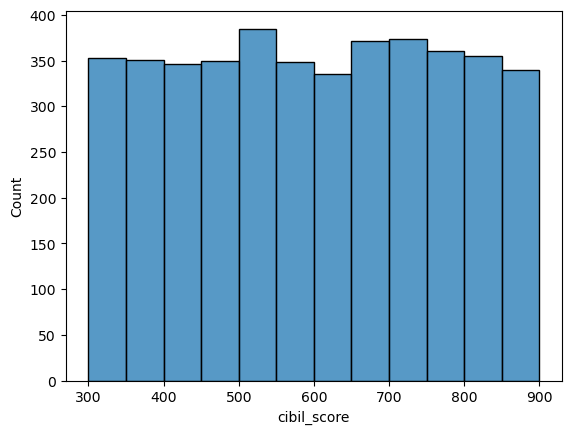

In [22]:
# cibil score distribution
sns.histplot(df["cibil_score"],bins=12)
plt.show()

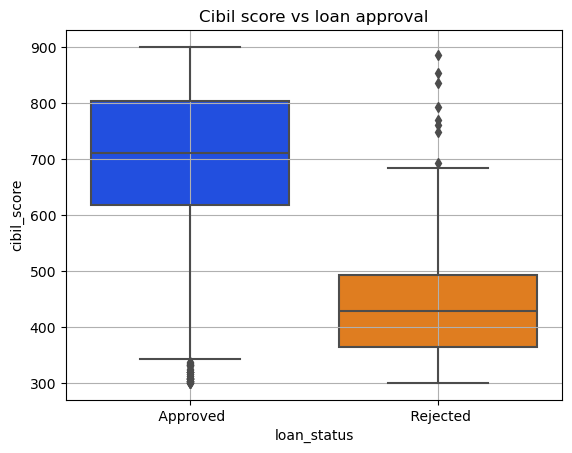

In [23]:
#CIBIL Score Vs Loan Status
sns.boxplot(x='loan_status', y='cibil_score', data=df, palette='bright')
plt.grid()
plt.title('Cibil score vs loan approval')
plt.show()


The graph  shows that people who got their loans approved tend to have higher CIBIL scores, mostly above 600. But for those whose loans weren't approved, the scores are more spread out and usually lower than 550. This means having a higher CIBIL score, especially over 600, really boosts the chances of getting a loan approved. It's clear that a good CIBIL score is important for loan approval.

# Data Preprocessing

### Label Encoding the categorical variables

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   no_of_dependents  4269 non-null   int64 
 1   education         4269 non-null   object
 2   self_employed     4269 non-null   object
 3   income_annum      4269 non-null   int64 
 4   loan_amount       4269 non-null   int64 
 5   loan_term         4269 non-null   int64 
 6   cibil_score       4269 non-null   int64 
 7   loan_status       4269 non-null   object
 8   Movable_assets    4269 non-null   int64 
 9   Immovable_assets  4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


In [25]:
df['education'] = df['education'].map({' Not Graduate':0, ' Graduate':1})
df['self_employed'] = df['self_employed'].map({' No':0, ' Yes':1})
df['loan_status'] = df['loan_status'].map({' Rejected':0, ' Approved':1})

In [26]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


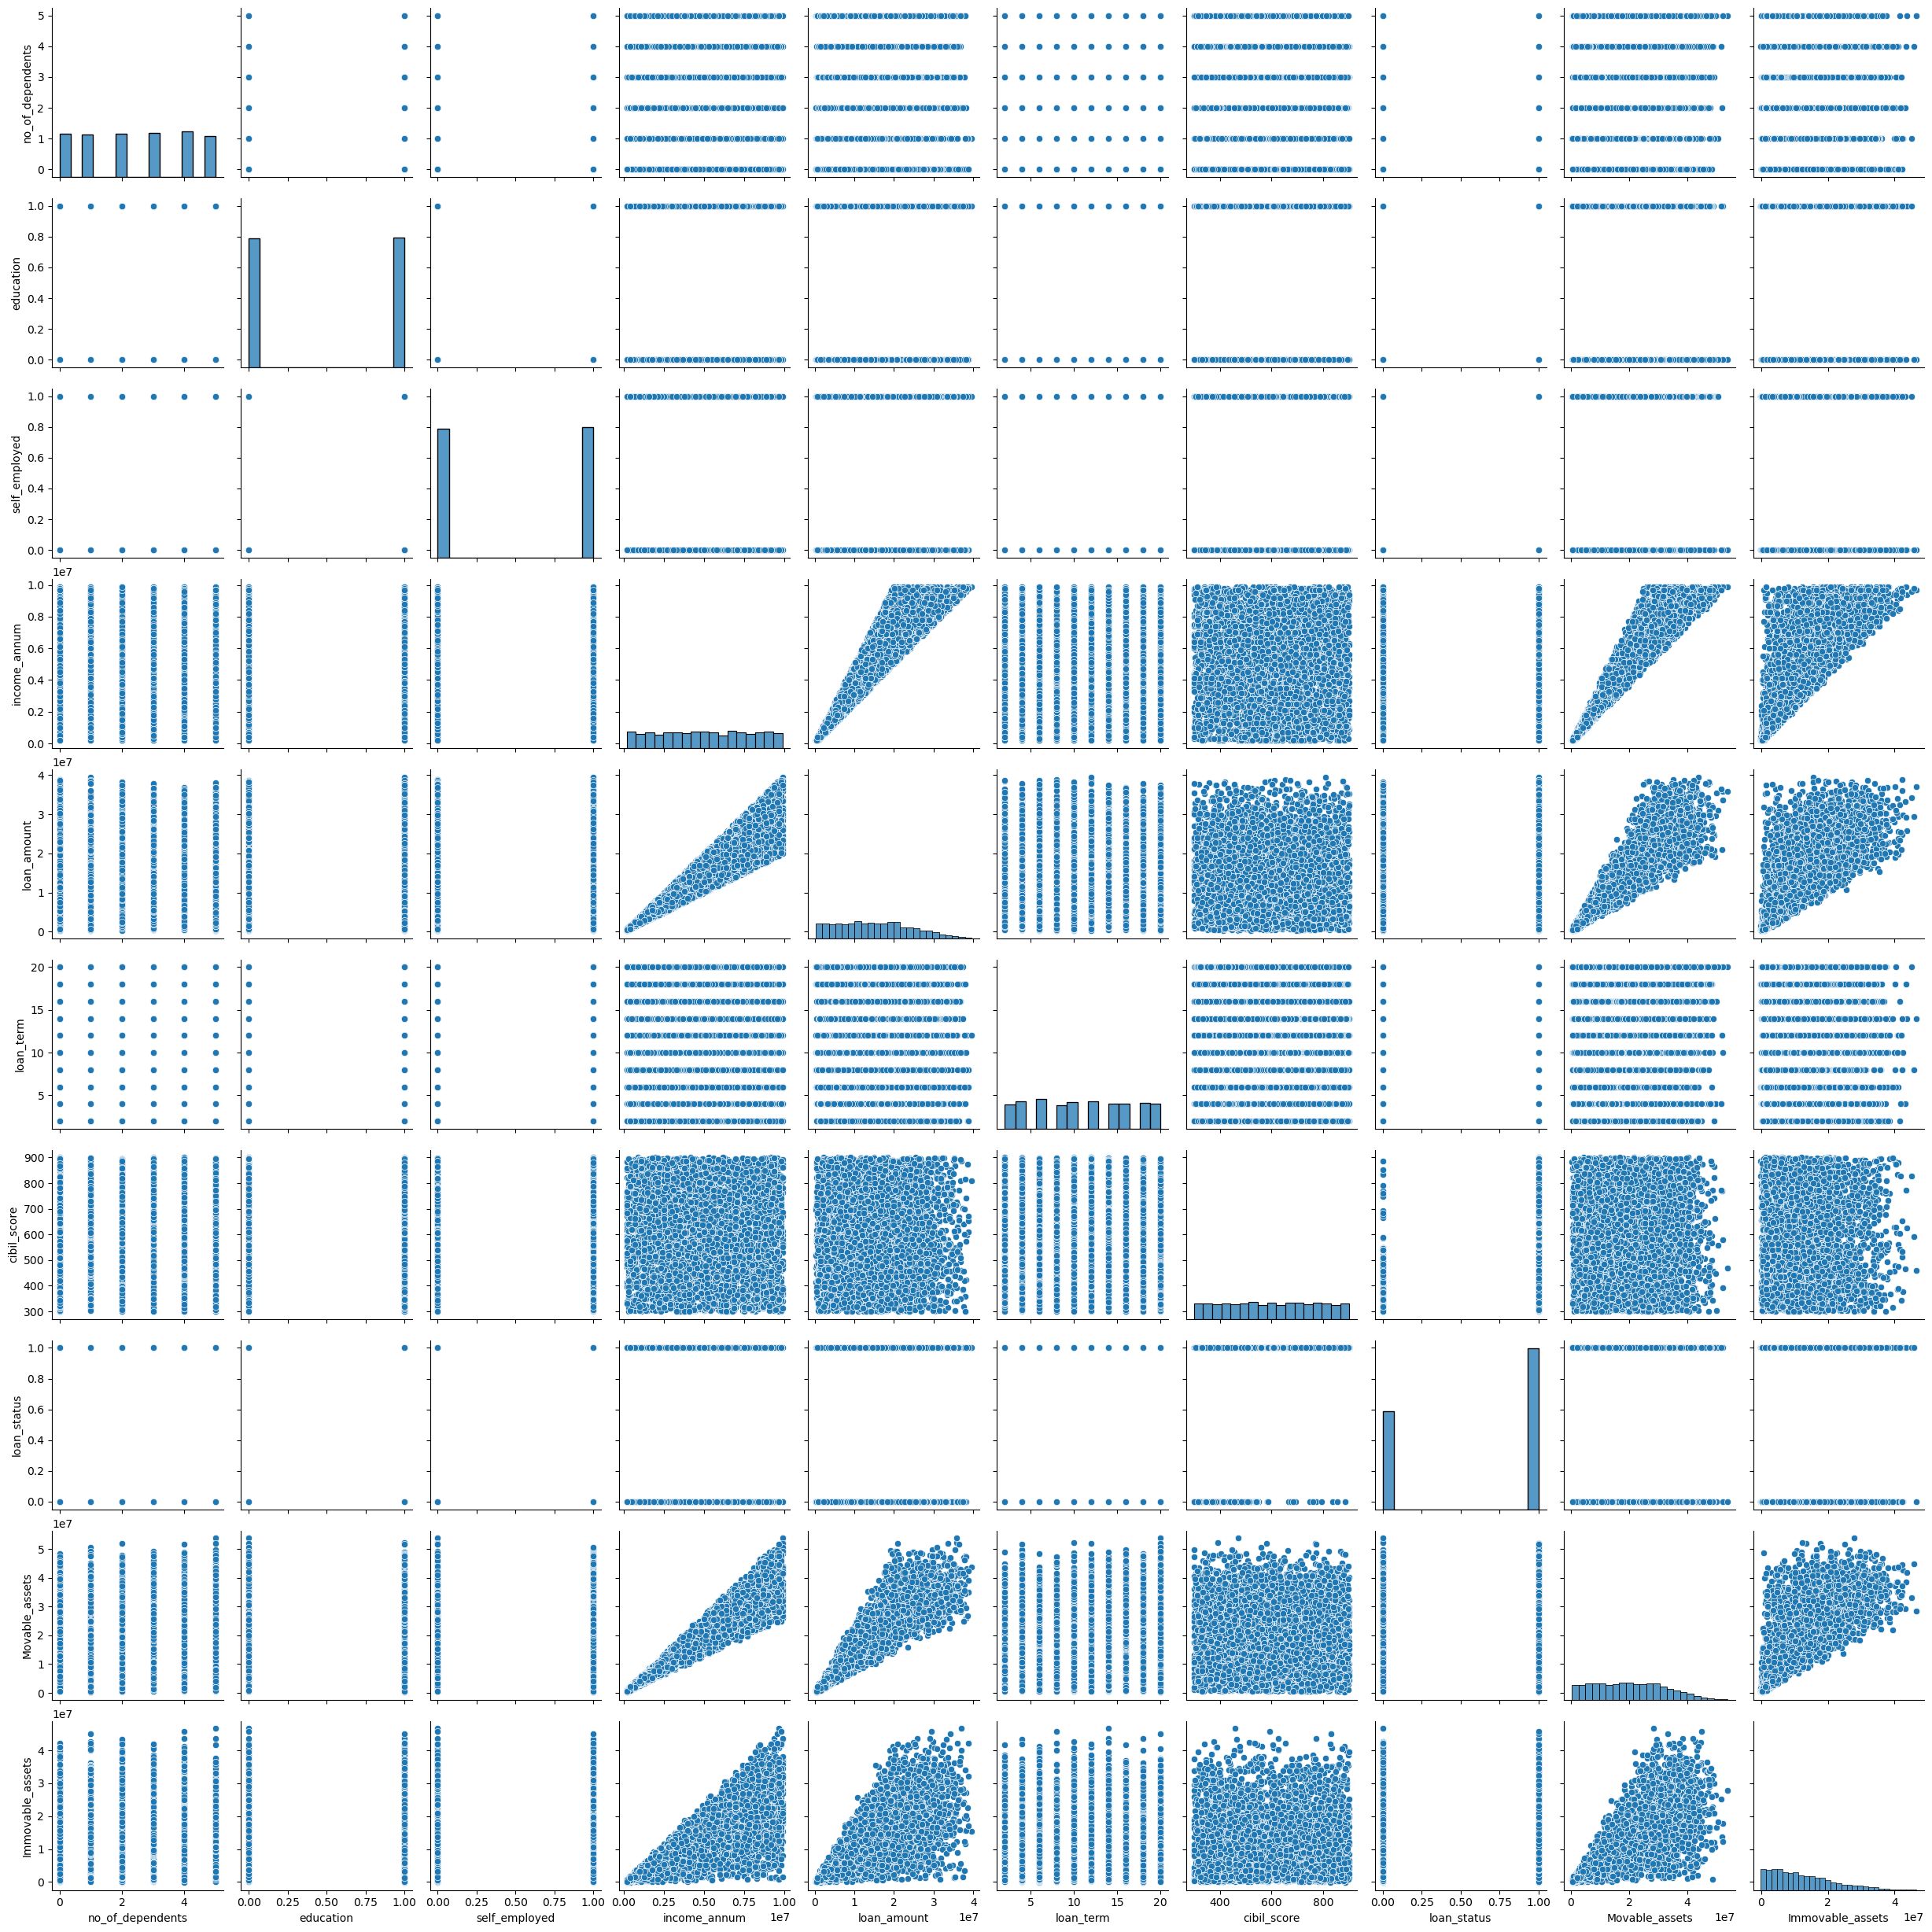

In [27]:
sns.pairplot(df)

In [28]:
corr =df.corr()
corr.style.background_gradient()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
no_of_dependents,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,-0.018114,0.005232,0.004468
education,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.004918,0.012179,0.004485
self_employed,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.000345,0.003335,-0.004228
income_annum,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,-0.015189,0.948324,0.753006
loan_amount,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.016150,0.878555,0.705592
loan_term,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,-0.113036,0.014323,0.003042
cibil_score,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,0.770518,-0.026261,-0.015843
loan_status,-0.018114,0.004918,0.000345,-0.015189,0.016150,-0.113036,0.770518,1.000000,-0.013755,-0.006200
Movable_assets,0.005232,0.012179,0.003335,0.948324,0.878555,0.014323,-0.026261,-0.013755,1.000000,0.709915
Immovable_assets,0.004468,0.004485,-0.004228,0.753006,0.705592,0.003042,-0.015843,-0.006200,0.709915,1.000000


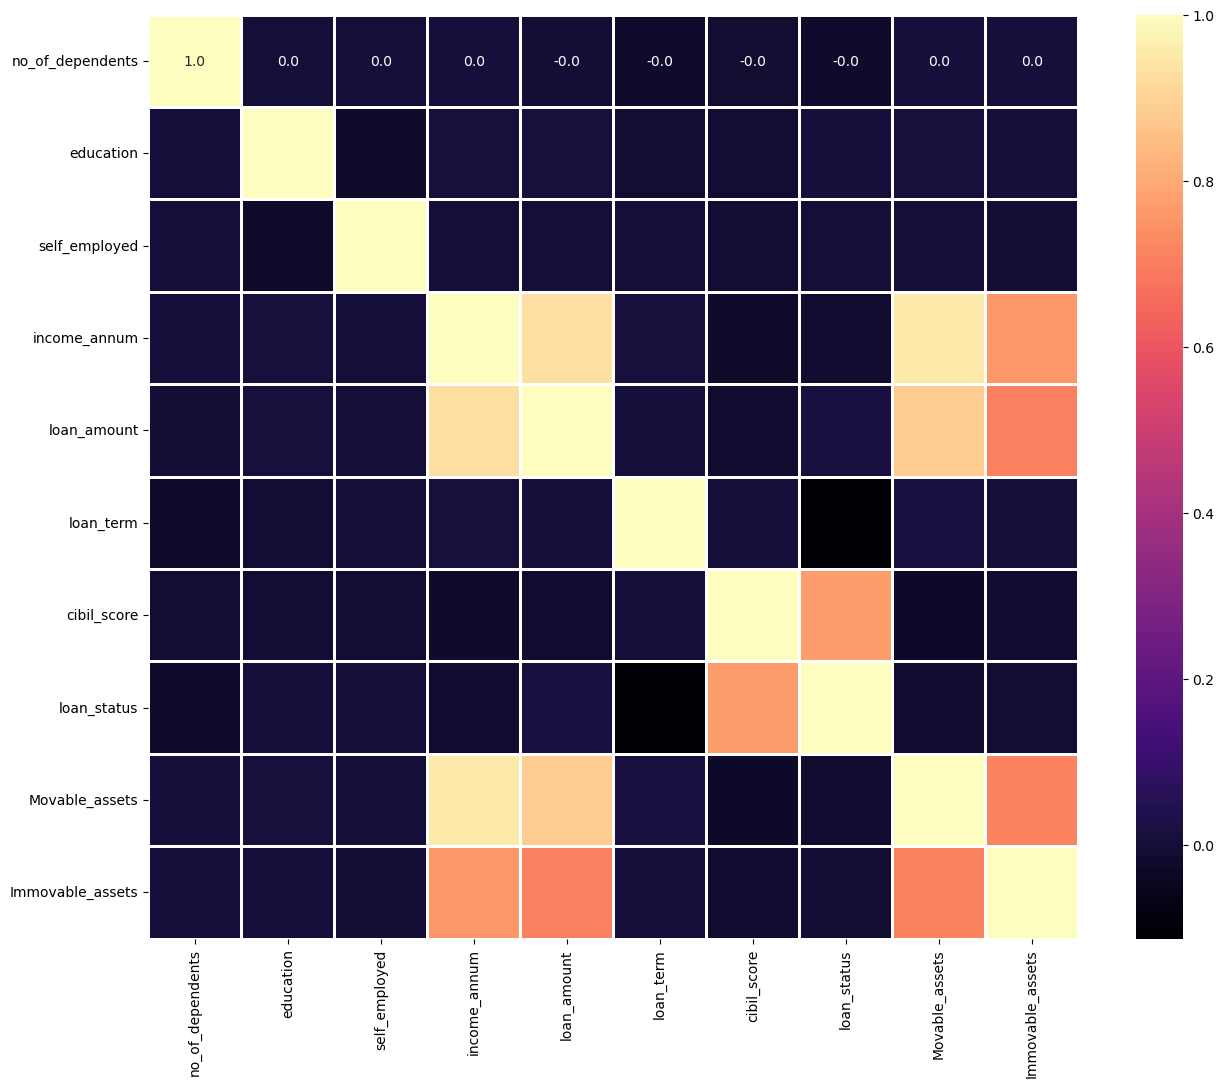

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cbar=True, cmap='magma', fmt='.1f', linewidths=1)
plt.show()

In [30]:
df.corr()['loan_status']

no_of_dependents   -0.018114
education           0.004918
self_employed       0.000345
income_annum       -0.015189
loan_amount         0.016150
loan_term          -0.113036
cibil_score         0.770518
loan_status         1.000000
Movable_assets     -0.013755
Immovable_assets   -0.006200
Name: loan_status, dtype: float64

### The heatmap of correlation values shows several strong connections:
1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

movable and immovable assets are related since they're both types of assets. Similarly, income is linked to both movable and immovable assets, as those with higher income tend to have more assets.

### Loan Amount Vs Income

<Axes: xlabel='income_annum', ylabel='loan_amount'>

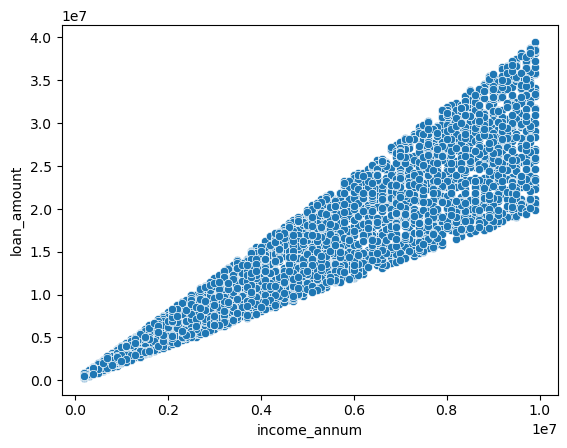

In [31]:
sns.scatterplot(x='income_annum', y = 'loan_amount', data = df)

The loan amount and the applicant's annual income share a straightforward connection. When the income is higher, the loan amount tends to be higher as well.

# Machine Learning Model Decision.

In [32]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score ,classification_report , confusion_matrix,r2_score,f1_score,mean_absolute_error,mean_squared_error

In [33]:
# defining dependent and independent variables
x = df.drop('loan_status',axis=1)
y = df['loan_status']

Train test split

In [34]:
from sklearn.model_selection import train_test_split

xtrain ,xtest , ytrain ,ytest = train_test_split(x,y,test_size=0.2 , random_state=1)

In [35]:
#creating function to apply different models.
# this function apply the model and give the accuracy score and classification report
def mymodel(m):
    m.fit(xtrain,ytrain)
    ypred = m.predict(xtest)
    
    print(f'accuracy_score: {accuracy_score(ytest,ypred)}')
    print(f'classification_report:\n{classification_report(ytest,ypred)}')
    
    return m

## 1. Logistic Regression

In [36]:
# importing library
from sklearn.linear_model import LogisticRegression

# creating instance
lgr = LogisticRegression()

# applying model using fucntion
mymodel(lgr)

accuracy_score: 0.6100702576112412
classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.61      1.00      0.76       521

    accuracy                           0.61       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.37      0.61      0.46       854



LogisticRegression()

### HPT

In [37]:
#using liblinear solver
lr1 = LogisticRegression(solver='liblinear')

mymodel(lr1)

accuracy_score: 0.6100702576112412
classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.61      1.00      0.76       521

    accuracy                           0.61       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.37      0.61      0.46       854



LogisticRegression(solver='liblinear')

In [38]:
lr3 = LogisticRegression(solver='newton-cg')

mymodel(lr3)

accuracy_score: 0.7704918032786885
classification_report:
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       333
           1       0.76      0.91      0.83       521

    accuracy                           0.77       854
   macro avg       0.78      0.73      0.74       854
weighted avg       0.78      0.77      0.76       854



LogisticRegression(solver='newton-cg')

- By using newton-cg solver we are getting highest accuracy score of 77%  which is not satisfying accuracy. 

### 2. Support Vector Classification (SVC)

In [39]:
from sklearn.svm import SVC

svc = SVC()

mymodel(svc)

accuracy_score: 0.6100702576112412
classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.61      1.00      0.76       521

    accuracy                           0.61       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.37      0.61      0.46       854



SVC()

### HPT

In [40]:
svc2 = SVC(kernel='sigmoid')
mymodel(svc2)

accuracy_score: 0.5304449648711944
classification_report:
              precision    recall  f1-score   support

           0       0.39      0.35      0.37       333
           1       0.61      0.64      0.63       521

    accuracy                           0.53       854
   macro avg       0.50      0.50      0.50       854
weighted avg       0.52      0.53      0.53       854



SVC(kernel='sigmoid')

In [41]:
svc1 = SVC(kernel= 'poly')

mymodel(svc1)

accuracy_score: 0.6100702576112412
classification_report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.61      1.00      0.76       521

    accuracy                           0.61       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.37      0.61      0.46       854



SVC(kernel='poly')

default kernal lbf and poly giving same accuracy of 61% which is not good.

## 3. Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(xtrain, ytrain)

dtree_pred = dtree.predict(xtest)

In [43]:
#accuracy
accuracy = accuracy_score(ytest,dtree_pred)
print("Accuracy:", accuracy)
print(f'classification report:\n{classification_report(ytest,dtree_pred)}')

Accuracy: 0.9871194379391101
classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.99      0.99      0.99       521

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [44]:
actrain = dtree.score(xtrain,ytrain)
actest = dtree.score(xtest,ytest)

print(f'train score:{actrain}\ntest score:{actest}')

train score:1.0
test score:0.9871194379391101


- Training score is high and test score is low so it is case of low bias high variance
- model is overfitting

#### 1. HPT decision tree by tuning max depth

In [45]:
for i in range(1,11):
    dt1= DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred = dt1.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    print(f'max_depth = {i}, accuracy_score - {ac}')

max_depth = 1, accuracy_score - 0.9484777517564403
max_depth = 2, accuracy_score - 0.9601873536299765
max_depth = 3, accuracy_score - 0.9637002341920374
max_depth = 4, accuracy_score - 0.9648711943793911
max_depth = 5, accuracy_score - 0.9648711943793911
max_depth = 6, accuracy_score - 0.9730679156908665
max_depth = 7, accuracy_score - 0.968384074941452
max_depth = 8, accuracy_score - 0.9742388758782201
max_depth = 9, accuracy_score - 0.9730679156908665
max_depth = 10, accuracy_score - 0.9742388758782201


In [46]:
dt2 = DecisionTreeClassifier(max_depth=4)

mymodel(dt2)

actrain = dt2.score(xtrain,ytrain)
actest = dt2.score(xtest,ytest)

print(f'train score:{actrain}\ntest score:{actest}')

accuracy_score: 0.9648711943793911
classification_report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       333
           1       0.95      0.99      0.97       521

    accuracy                           0.96       854
   macro avg       0.97      0.96      0.96       854
weighted avg       0.97      0.96      0.96       854

train score:0.9695461200585651
test score:0.9648711943793911


- by using decision tree maxdepth we get 96% accuracy

#### 2. HPT decision tree by tuning min sample split 

In [47]:
for i in range(11,21):
    dt3= DecisionTreeClassifier(max_depth=i)
    dt3.fit(xtrain,ytrain)
    ypred = dt3.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    print(f'max_depth = {i}, accuracy_score - {ac}')

max_depth = 11, accuracy_score - 0.9754098360655737
max_depth = 12, accuracy_score - 0.9847775175644028
max_depth = 13, accuracy_score - 0.9836065573770492
max_depth = 14, accuracy_score - 0.9847775175644028
max_depth = 15, accuracy_score - 0.9859484777517564
max_depth = 16, accuracy_score - 0.9824355971896955
max_depth = 17, accuracy_score - 0.9847775175644028
max_depth = 18, accuracy_score - 0.9824355971896955
max_depth = 19, accuracy_score - 0.9847775175644028
max_depth = 20, accuracy_score - 0.9847775175644028


In [48]:
dt4 = DecisionTreeClassifier(min_samples_split=14)

mymodel(dt4)

actrain = dt4.score(xtrain,ytrain)
actest = dt4.score(xtest,ytest)

print(f'train score:{actrain}\ntest score:{actest}')

accuracy_score: 0.9847775175644028
classification_report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.99      0.98      0.99       521

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

train score:0.9947291361639824
test score:0.9847775175644028


- by using decision tree min sample split we get 98% accuracy

#### 3. HPT decision tree by tuning min sample leaf

In [49]:
for i in range(1,20):
    dt5= DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(xtrain,ytrain)
    ypred = dt5.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    print(f'max_depth = {i}, accuracy_score - {ac}')

max_depth = 1, accuracy_score - 0.9847775175644028


max_depth = 2, accuracy_score - 0.9836065573770492
max_depth = 3, accuracy_score - 0.9847775175644028
max_depth = 4, accuracy_score - 0.9847775175644028
max_depth = 5, accuracy_score - 0.9871194379391101
max_depth = 6, accuracy_score - 0.9847775175644028
max_depth = 7, accuracy_score - 0.9859484777517564
max_depth = 8, accuracy_score - 0.9859484777517564
max_depth = 9, accuracy_score - 0.9824355971896955
max_depth = 10, accuracy_score - 0.9836065573770492
max_depth = 11, accuracy_score - 0.9812646370023419
max_depth = 12, accuracy_score - 0.9800936768149883
max_depth = 13, accuracy_score - 0.9824355971896955
max_depth = 14, accuracy_score - 0.9824355971896955
max_depth = 15, accuracy_score - 0.9836065573770492
max_depth = 16, accuracy_score - 0.9836065573770492
max_depth = 17, accuracy_score - 0.9765807962529274
max_depth = 18, accuracy_score - 0.9765807962529274
max_depth = 19, accuracy_score - 0.9765807962529274


In [50]:
dt6 = DecisionTreeClassifier(min_samples_leaf=16)

mymodel(dt6)

actrain = dt6.score(xtrain,ytrain)
actest = dt6.score(xtest,ytest)

print(f'train score:{actrain}\ntest score:{actest}')

accuracy_score: 0.9836065573770492
classification_report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       333
           1       0.98      0.99      0.99       521

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

train score:0.9865300146412884
test score:0.9836065573770492


- by using decision tree min sample leaf we get 98% accuracy

## 4. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(xtrain, ytrain)

rfc_pred = rfc.predict(xtest)

In [52]:
accuracy = accuracy_score(ytest,rfc_pred)
print("Accuracy:", accuracy)
print(f'classification report:\n{classification_report(ytest,rfc_pred)}')

Accuracy: 0.9824355971896955
classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       333
           1       0.98      0.99      0.99       521

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



- Using randome forest getting 98% accuracy

## 5 . Boosting classifiers

In [53]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

### 1 . Adaboost classifier

In [54]:
ad = AdaBoostClassifier()

mymodel(ad)

accuracy_score: 0.9625292740046838
classification_report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       333
           1       0.98      0.96      0.97       521

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



AdaBoostClassifier()

- using adaboost classifier getting 96% accuracy

### 2. Gradient boost classifier

In [55]:
gb = GradientBoostingClassifier()

mymodel(gb)

accuracy_score: 0.9882903981264637
classification_report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       333
           1       0.99      0.99      0.99       521

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



GradientBoostingClassifier()

- using Gradient Boosting classifier getting 98.82% accuracy

### 3. XGB classifier

In [59]:
xgb = XGBClassifier()

mymodel(xgb)

accuracy_score: 0.9871194379391101
classification_report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       333
           1       0.98      0.99      0.99       521

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

- using XGB classifier getting 98.71% accuracy

## Coclusion

When looking at different ways to predict if loans will be approved or not, we found that the Decision Tree, random forest, and all boosting model worked really well. It was accurate and could predict outcomes quite accurately.This tells us that picking the right model is really important. The Decision Tree, boosting classifiers and Random Forest models were great for this data, but SVM and Logistic Regression weren't a good fit.

Machine learning models involved the utilization of the Decision Tree Classifier, the Random Forest Classifier,XGB Boost,gradient and Adaboost classifier . all this models yielded remarkable outcomes, demonstrating their potential to effectively analyze and classify data.

The final conclusion on the Bank Loan Prediction is that decision tree with tuning max leaf and min sample split is working well with accuracy score of 98% .Also Gradient Boosting and XGB Boosting also giving accuracy more than 98%. 

still there is no huge difference between both decision tree and Boosting classifiers